#  Diabetes - Machine Learning Predictive Models
By: Eraldi Skendaj



    
    
    Atribute Information
    
1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1)  


# Import python libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from statsmodels.graphics.mosaicplot import mosaic
%matplotlib inline

# Load and analyze the Dataset 

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'

In [5]:
dataset = pd.read_csv(url, names=['num_pregnant','glucose','blood_press','skin_fold_thicknes','insulin','BMI',
                                 'pedigree_function','age','Class'])

Next we will get more information about the dataset itself

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
num_pregnant          768 non-null int64
glucose               768 non-null int64
blood_press           768 non-null int64
skin_fold_thicknes    768 non-null int64
insulin               768 non-null int64
BMI                   768 non-null float64
pedigree_function     768 non-null float64
age                   768 non-null int64
Class                 768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


This dataset as 9 attributes and 768 instances. At first it appears as if there are no empty values but this will have to be explored further.

In [13]:
#Checking the dataset itself.

dataset.head(5)

,num_pregnant,glucose,blood_press,skin_fold_thicknes,insulin,BMI,pedigree_function,age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Looking at the data it is clear to see that all the date is either an integer or a float. The class attribute is indicates wether the patient is positive (1= has the disease) or negative (0 = does not have the disease). It can also be seen that the data is not scaled and therefore some form of standardization/normalization may be necessary for the machine learning algorithms.

In [17]:
# Taking a quick look at the summary of the dataset.
dataset.drop('Class', axis=1).describe()

,num_pregnant,glucose,blood_press,skin_fold_thicknes,insulin,BMI,pedigree_function,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Looking at the minimum values for some of the attributes it becomes clear that there are 0 values where they shouldn't be. For example: 0 values for blood pressure. This is a case where 0 values most likely are used to replace empty values in this dataset.

# Checking the dataset for empty values

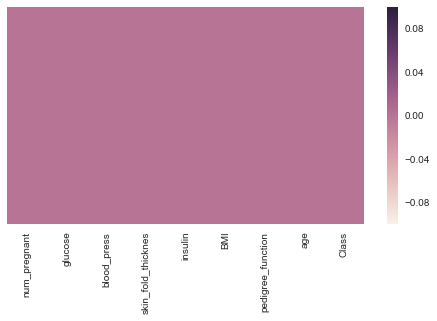

In [23]:
plt.figure (figsize=(8,4))
sns.heatmap(dataset.isnull(),yticklabels=False)

A first look at the heatmap of the dataset shows that there are no missing values. Now lets take a look to see if the zero values make sense. Biologically it is not possible for the following attributes to have zero values unless they were not alive:

Blood Pressure
BMI
Blood Glucose
Possibly Insulin if attributes such as blood pressure and BMI are aslo zero

# Visualizing zero values in the Dataframe

First we apply a funtion to the dataframe to check for zero values within the dataframe then we visualize the zero values through a heatmap for columns where zero values do not make sense biologically. It looks like null values are substituted for for zeros.

In [42]:
zeros=dataset.apply(lambda x: x==0)

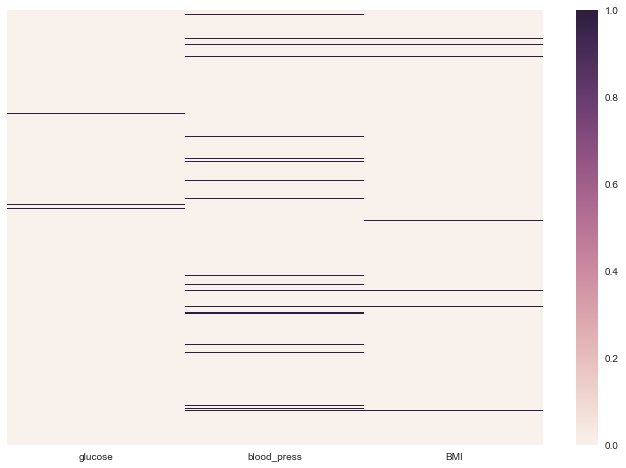

In [216]:
plt.figure(figsize=(12,8))
sns.heatmap(zeros.drop(['Class','age','skin_fold_thicknes','num_pregnant','pedigree_function','insulin'], axis=1), 
            yticklabels= False)

These zero values need to be imputed so they do not throw off the the machine learning algorithms. First we create a new dataframe that will hold the data where zero values make no sense biologically.

No we impute the zero values from this dataframe where we replace the zero values with the mean value.

In [75]:
dataset.head(3)

,num_pregnant,glucose,blood_press,skin_fold_thicknes,insulin,BMI,pedigree_function,age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [141]:
from sklearn.preprocessing import Imputer

In [142]:
imputer = Imputer(missing_values=0,strategy='mean', axis=0)

In [143]:
imputer.fit(dataset[['glucose','blood_press','BMI']])

Imputer(axis=0, copy=True, missing_values=0, strategy='mean', verbose=0)

In [144]:
dataset[['glucose','blood_press','BMI']]=imputer.transform(dataset[['glucose','blood_press','BMI']])

Checking to see if the zeros where substituted

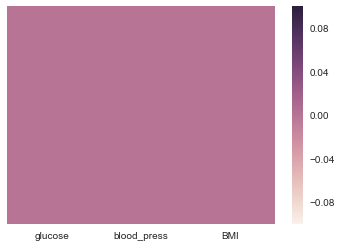

In [164]:
sns.heatmap(dataset[['glucose','blood_press','BMI']].apply(lambda x: x==0), yticklabels=False)

All zeros where substituted by the mean values. We can check this by looking at the description of the dataframe once again.

In [165]:
dataset.drop('Class', axis= 1). describe()

,num_pregnant,glucose,blood_press,skin_fold_thicknes,insulin,BMI,pedigree_function,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,20.536458,79.799479,32.457464,0.471876,33.240885
std,3.369578,30.435949,12.096346,15.952218,115.244002,6.875151,0.331329,11.760232
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.202592,23.000000,30.500000,32.400000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


As it can be seen from the description table the minimum values for glucose,blood_pressure and BMI attributes are no longer zero. 

Encoding the Class attribute.

In [166]:
Class = pd.get_dummies(dataset['Class'],drop_first=True)

In [167]:
dataset =pd.concat([dataset,Class],axis=1)

In [168]:
dataset.head()

,num_pregnant,glucose,blood_press,skin_fold_thicknes,insulin,BMI,pedigree_function,age,Class,1
0,6,148.0,72.0,35,0,33.6,0.627,50,1,1
1,1,85.0,66.0,29,0,26.6,0.351,31,0,0
2,8,183.0,64.0,0,0,23.3,0.672,32,1,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1,1


In [169]:
dataset.drop('Class',axis =1 ,inplace= True)

In [170]:
dataset.head()

,num_pregnant,glucose,blood_press,skin_fold_thicknes,insulin,BMI,pedigree_function,age,1
0,6,148.0,72.0,35,0,33.6,0.627,50,1
1,1,85.0,66.0,29,0,26.6,0.351,31,0
2,8,183.0,64.0,0,0,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1


In [171]:
dataset.rename(columns={1:'Class'}, inplace=True)

Checking to see if the column was renamed after Class attribute was encoded.

In [172]:
dataset.head()

,num_pregnant,glucose,blood_press,skin_fold_thicknes,insulin,BMI,pedigree_function,age,Class
0,6,148.0,72.0,35,0,33.6,0.627,50,1
1,1,85.0,66.0,29,0,26.6,0.351,31,0
2,8,183.0,64.0,0,0,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1


### Checking the class distribution.

In [176]:
dataset['Class'].value_counts()

0    500
1    268
Name: Class, dtype: int64

As it can be seen 268 people have the disease and 500 do not have the disease. Based on this it looks like the data is skewed.

# Data Visualization

Since all the patients are women the two obvious attributes to check are the age and the number of times a woman has been pregnant.

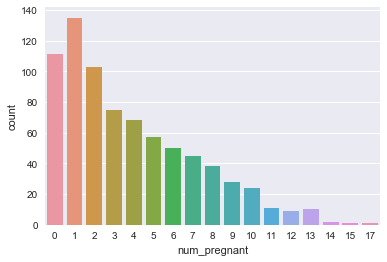

In [183]:
sns.countplot(x='num_pregnant', data = dataset)

The chart above shows that women who have 1-5 pregnancies are the majority. Next let's check how the number of pregnancies affects whether one is has the disease or not.

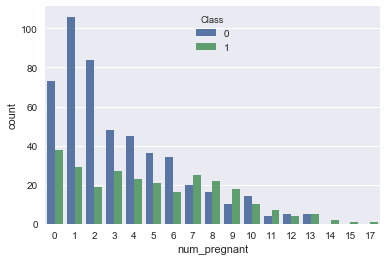

In [185]:
sns.countplot(x='num_pregnant', data = dataset, hue = 'Class')

A first look of the data shows that the likelyhood of having the disease increases for women having more pregnancies.

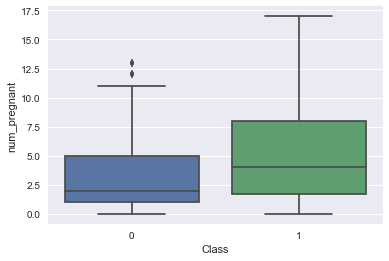

In [213]:
sns.boxplot(x='Class',y='num_pregnant',data=dataset)

Healthy women have a mean number of 2.3 pregnancies. Women with diabetes have a mean number of roughly 3-4 pregnancies.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121df6cc0>]], dtype=object)

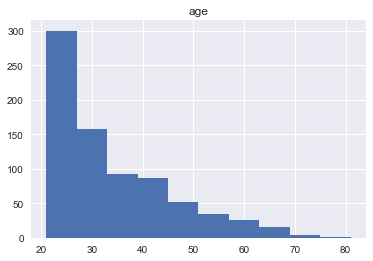

In [193]:
dataset.hist(column ='age', bins=10)

The majority of the women in this dataset are between 20-45 years old.

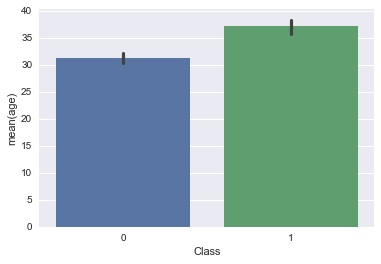

In [200]:
sns.barplot(x='Class', y='age', data= dataset)


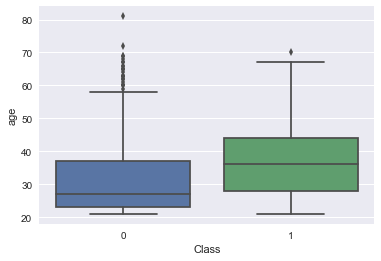

In [214]:
sns.boxplot(x='Class', y='age', data=dataset)

The mean age of healthy women is around 30- 32 years old. The mean age of women with diabetes is around 33-37 years old. So dieabetes affects the women in this dataset at an early age.

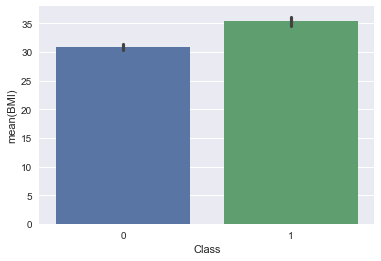

In [209]:
sns.barplot(x='Class', y='BMI', data= dataset)

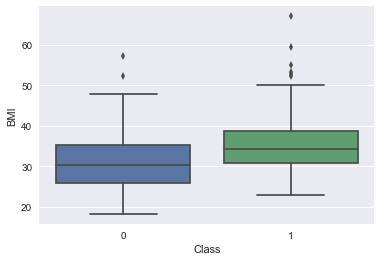

In [212]:
sns.boxplot(x='Class', y='BMI', data=dataset)

As expect from literature people with a higher body mass index are at a higher risk of diabetes. Here people with the disease have a mean BMI of around 35, while those without the dieases have mean BMI of around 31.

Next insulin levels between patients will be compared

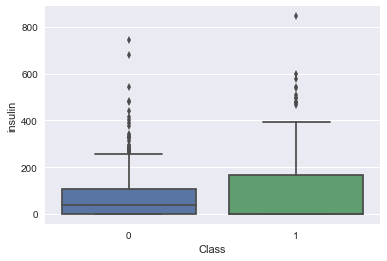

In [220]:
sns.boxplot(x='Class', y='insulin', data=dataset)

While there a difference in the distribution of the values for insulin levels not much can be said about separating the classes on the mean values of insuling levles.

To see how the other variables correlate with the the patients having a disease we will go through the following visualizations.

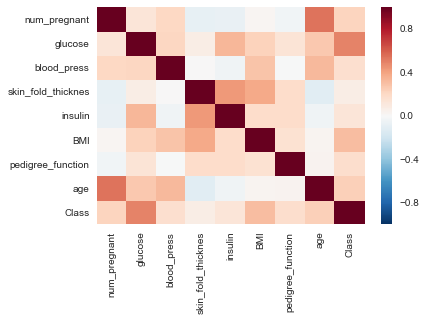

In [210]:
sns. heatmap(dataset.corr())

As it can be seen and as expected from literature glucose level and BMI are highly correlated with the likelyhood of a person having diabetes or not.

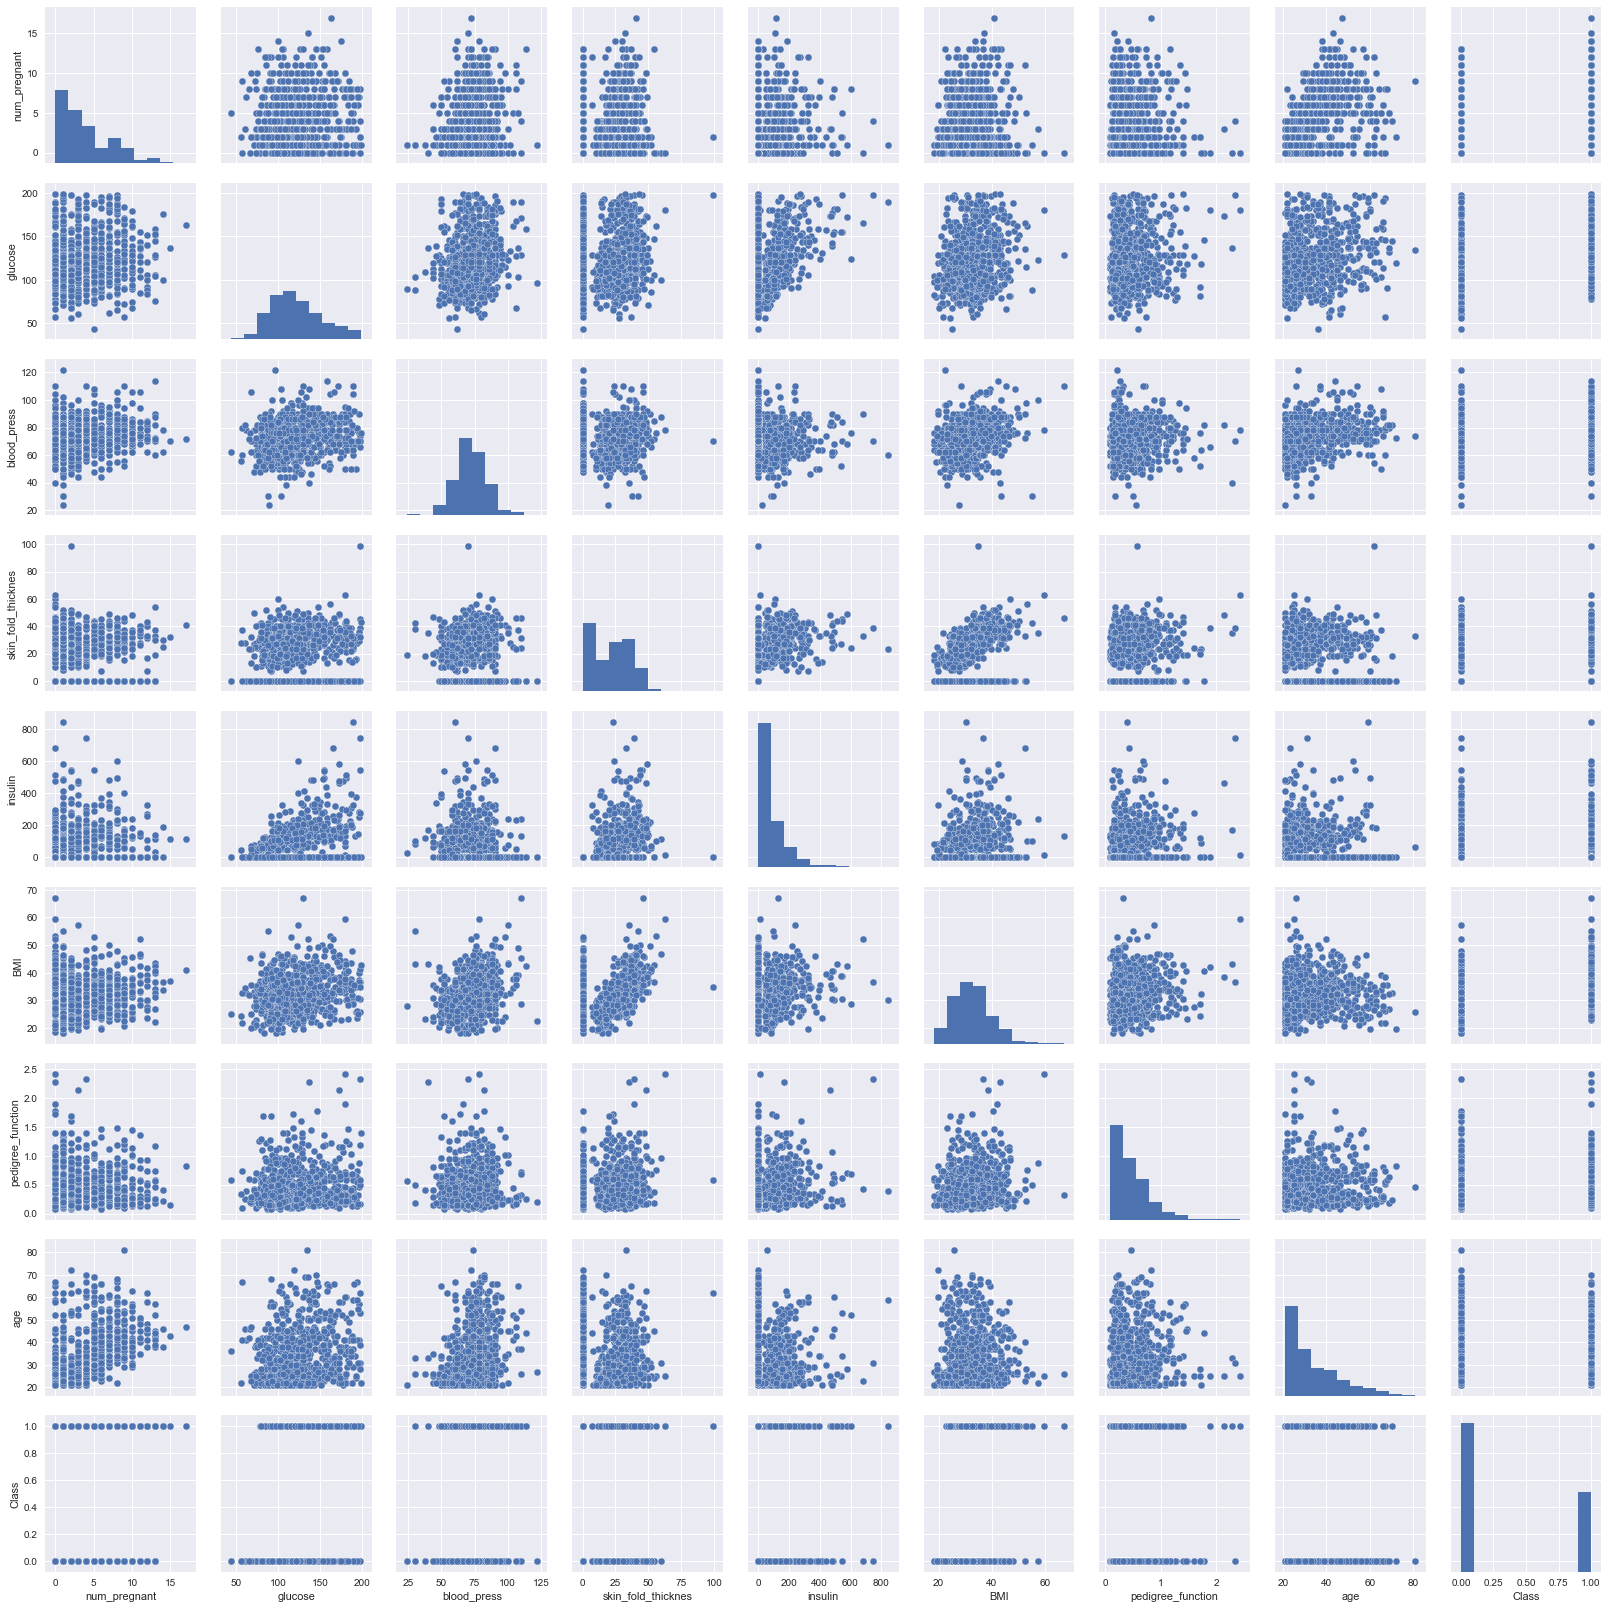

In [222]:
sns.pairplot(dataset)

The plot above shows some interesting correlations between the attributes, such as the following:

Insulin and glucose
Blood pressure and BMI
Blood pressure and age
Age and the amount of times a woman has been pregnant
Insulin and skin_fold_thicknes
BMI and and skin_fold_thicknes
Blood pressure and BMI


## This data file will be cleaned and exported for further processing.

In [223]:
dataset.to_csv('cleaned_data.csv')

# Conclusion:

Based on the patients observed on this dataset, on average women who have the disease tend to be older, have had more pregnancies and have a higher BMI than the women that do not have diabetes. As the heatmap above showed, blood glucose also shows a strong correlation with the presence of the disease. Although this last point is not surprising at all as, blood glucose is an attribute that is monitored constantly for people with diabetes. However data may need to be normalized/standardized for possible further insights.